In [20]:
# def1 - full scatter

# scale1: members have (etab,sigb) = (0.5,0.1) and (etaa,siga) = (0.4,0.03)
#         los gas have (etab,sigb) = (0.5,0.3) and a=2.0 [fixed]

import numpy as np
from astropy.cosmology import FlatLambdaCDM
import matplotlib.pyplot as plt
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

import sys
sys.path.insert(1, '../../coderesources')
import fitclust2d as myfit
import fitClus2D as fc
cluster = 'a2744'
zlens = 0.308

# load the images
imgdat = myfit.imgclass('Files/a2744_images.dat',zlens,cosmo)

# ultimately the fit will optimize the two normalization parameters;
# since b is multiplicative, we can fix the normalization to unity here
# and later rescale; we do need to run with different a values (see below)
b0 = 0.0
a0 = 2.0
nran = 3000

# members, referenced to BCG
memdat = myfit.galclass('Files/a2744gals.txt',logflags=[True,True])
memdat.scale(b0,0.5,0.1,a0,0.4,0.03,ref=[35])

# generate the deflection distributions
aarr = np.linspace(1.0,2.5,31)
memdef = myfit.defclass()
memdef.draw(memdat,imgdat,b0,[1.0],nran,useD=True)

# # los1, referenced to BCG in memdat; note that we use a=2.0 for all
# m0 = memdat.ref[1]
# los1dat = myfit.galclass('../dat/los1.dat',logflags=[True,True])
# los1dat.scale(b0,0.5,0.3,a0,0.0,0.00,ref=[-1,m0])

# # generate the deflection distributions
# aarr = np.linspace(1.9,2.1,3)
# los1def = myfit.defclass()
# los1def.draw(los1dat,imgdat,b0,aarr,nran,basename='def1-los1-scale1',useD=True)

# # los2, referenced to BCG in memdat; note that we use a=2.0 for all
# m0 = memdat.ref[1]
# los2dat = myfit.galclass('../dat/los2.dat',logflags=[True,True])
# los2dat.scale(b0,0.5,0.3,a0,0.0,0.00,ref=[-1,m0])

# # generate the deflection distributions
# aarr = np.linspace(1.9,2.1,3)
# los2def = myfit.defclass()
# los2def.draw(los2dat,imgdat,b0,aarr,nran,basename='def1-los2-scale1',useD=True)

Read image data from file Files/a2744_images.dat
Read galaxy data from file Files/a2744gals.txt
Generating deflection distribution: a = 1.0
Step 0
Step 500
Step 1000
Step 1500
Step 2000
Step 2500


In [21]:
print(memdef.marr[0])

[[-1.20840741e+00 -4.86653778e-01]
 [-1.09763140e+00 -1.17768957e+00]
 [ 3.57143053e-01 -1.29011402e+00]
 [-5.99545992e-01  9.13247732e-01]
 [-4.54727496e-01  1.04194090e+00]
 [-7.38493285e-01 -3.39758397e-01]
 [-1.33593124e+00 -3.80635877e-01]
 [ 4.94715887e-01 -1.01322690e+00]
 [-1.47536566e+00 -7.35087942e-01]
 [-1.48555829e+00 -8.43011579e-01]
 [-1.22484044e+00 -3.65833872e-01]
 [-8.31509373e-01 -1.46632518e+00]
 [ 3.90001825e-01 -1.32827196e+00]
 [-7.81856402e-01  8.26771282e-01]
 [-5.82078480e-01  1.06956338e+00]
 [ 4.23417065e-01 -1.32098560e+00]
 [ 4.84590942e-01 -1.37001187e+00]
 [-1.09762337e+00  4.51035448e-01]
 [-6.00342865e-01  7.71682304e-01]
 [ 1.39911780e+00 -7.78683743e-01]
 [ 2.15339657e-01 -1.61801353e+00]
 [-1.28916144e+00 -6.27649677e-01]
 [-9.96095588e-01 -1.32853493e+00]
 [-1.06999488e+00 -4.78768723e-01]
 [-9.87423132e-01 -8.01406688e-01]
 [ 3.19258478e-01 -1.12294676e+00]
 [-6.25935963e-01 -1.58945603e+00]
 [-2.29733814e-01 -1.64840267e+00]
 [-1.22940543e+00 -4

In [22]:
memdefpaper = myfit.defclass()
memdefpaper.load('Files/' + cluster + '-def1-scale1')
print(memdef.marr[0] / memdefpaper.marr[0])

print(memdef.Cmat[0, 0] / memdefpaper.Cmat[0, 0])



Read deflection data from file Files/a2744-def1-scale1.pkl
[[1.00025803 0.99435045]
 [0.99997602 0.99973734]
 [0.99695907 0.99885159]
 [1.00952576 1.00591472]
 [1.01229571 1.00502276]
 [1.00068288 0.99732328]
 [1.00071573 0.99471417]
 [0.99890575 0.99968389]
 [0.99937873 0.9962776 ]
 [0.99939329 0.9967081 ]
 [1.00042022 0.99211269]
 [1.00031142 0.99911162]
 [0.99691413 0.99887585]
 [1.00736399 1.00676609]
 [1.00937366 1.00512495]
 [0.99774197 0.99833329]
 [0.9972861  0.99856017]
 [1.00535394 1.01091958]
 [1.0085724  1.00950423]
 [0.99979415 1.00177749]
 [0.99535815 0.99869041]
 [1.00029718 0.99557956]
 [0.99990872 0.99905636]
 [0.99983789 0.9950082 ]
 [0.99876923 0.99728593]
 [0.99683619 0.99887393]
 [1.00104795 0.99893615]
 [1.0003635  0.99878602]
 [1.00020401 0.99378466]
 [1.00378694 1.02816588]
 [0.99028403 0.96168392]
 [0.99697702 1.00048078]
 [0.99529132 0.99856111]
 [0.99643077 0.99921597]
 [0.99575368 0.9990246 ]
 [0.99607781 0.99902912]
 [0.99890804 1.01026184]
 [1.00089884 0.9

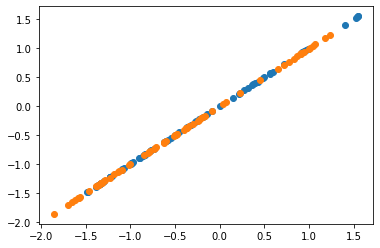

In [23]:
plt.scatter(memdef.marr[0,:,0], memdefpaper.marr[0,:,0])
plt.scatter(memdef.marr[0,:,1], memdefpaper.marr[0,:,1])


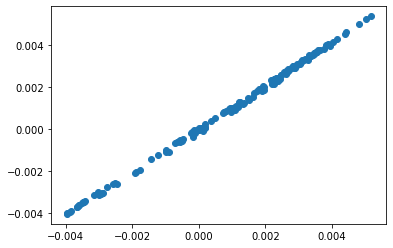

In [24]:
plt.scatter(memdef.Cmat[0, 0], memdefpaper.Cmat[0, 0])